#  KAMRAN BALAYEV DATA MINING SEMESTER PROJECT

## Climate Model Simulation Crashes
This dataset contains records of simulation crashes encountered during climate model uncertainty quantification ensembles.
Ensemble members were constructed using a Latin hypercube method in LLNL's UQ Pipeline software system to sample the uncertainties of 18 model parameters within the Parallel Ocean Program (POP2) component of the Community Climate System Model (CCSM4).

Three separate Latin hypercube ensembles were conducted, each containing 180 ensemble members. 46 out of the 540 simulations failed for numerical reasons at combinations of parameter values.

The goal is to use classification to predict simulation outcomes (fail or succeed) from input parameter values, and to use sensitivity analysis and feature selection to determine the causes of simulation crashes.

#### Attribute Information:

The goal is to predict climate model simulation outcomes (column 21, fail or succeed) given scaled values of climate model input parameters (columns 3-20).

Column 1: Latin hypercube study ID (study 1 to study 3)

Column 2: simulation ID (run 1 to run 180)

Columns 3-20: values of 18 climate model parameters scaled in the interval [0, 1]

Column 21: simulation outcome (0 = failure, 1 = success)


### Visualization of Classes via Usage of Weka

![image.png](images/Screenshot_22.jpg)

### Missing Data Results
#### Weka tool represents that missing data rates are zero for all of the attributes

![image.png](images/Screenshot_1.jpg)
![image.png](images/Screenshot_2.jpg)
![image.png](images/Screenshot_3.jpg)
![image.png](images/Screenshot_4.jpg)
![image.png](images/Screenshot_5.jpg)
![image.png](images/Screenshot_6.jpg)
![image.png](images/Screenshot_7.jpg)
![image.png](images/Screenshot_8.jpg)
![image.png](images/Screenshot_9.jpg)
![image.png](images/Screenshot_10.jpg)
![image.png](images/Screenshot_11.jpg)
![image.png](images/Screenshot_12.jpg)
![image.png](images/Screenshot_13.jpg)
![image.png](images/Screenshot_14.jpg)
![image.png](images/Screenshot_15.jpg)
![image.png](images/Screenshot_16.jpg)
![image.png](images/Screenshot_17.jpg)
![image.png](images/Screenshot_18.jpg)
![image.png](images/Screenshot_19.jpg)
![image.png](images/Screenshot_20.jpg)
![image.png](images/Screenshot_21.jpg)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [5]:
data = pd.read_csv('data/data.csv')
data.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.104226,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.975786,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.803413,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.597879,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.743877,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [6]:
data.shape

(540, 21)

In [7]:
data.columns

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max',
       'vertical_decay_scale            ', 'convect_corr', 'bckgrnd_vdc1',
       'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq', 'bckgrnd_vdc_psim', 'Prandtl',
       'outcome'],
      dtype='object')

In [8]:
data.info

<bound method DataFrame.info of      Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  \
0        1    1     0.859036  0.927825  0.252866  0.298838  0.170521   
1        1    2     0.606041  0.457728  0.359448  0.306957  0.843331   
2        1    3     0.997600  0.373238  0.517399  0.504993  0.618903   
3        1    4     0.783408  0.104055  0.197533  0.421837  0.742056   
4        1    5     0.406250  0.513199  0.061812  0.635837  0.844798   
..     ...  ...          ...       ...       ...       ...       ...   
535      3  176     0.657136  0.489375  0.133713  0.411950  0.087780   
536      3  177     0.915894  0.842720  0.518947  0.090622  0.336981   
537      3  178     0.478600  0.941185  0.769245  0.950776  0.189406   
538      3  179     0.007793  0.779287  0.867468  0.704820  0.983282   
539      3  180     0.608075  0.031556  0.598264  0.794771  0.145680   

     vconst_7   ah_corr  ah_bolus  ...  efficiency_factor  tidal_mix_max  \
0    0.735936  0.428325  0.

#### Visualization


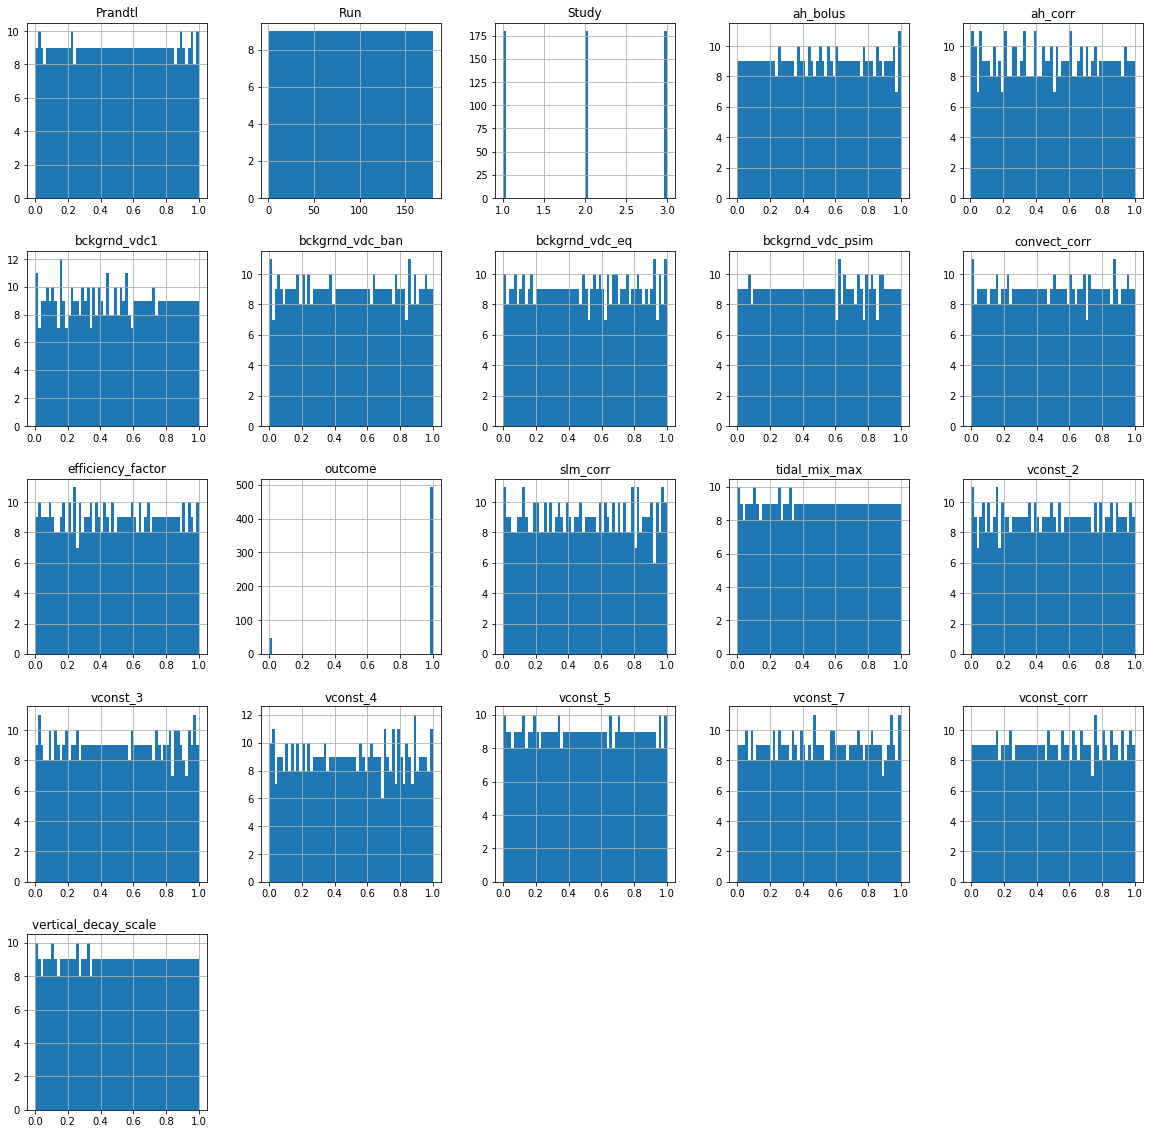

In [9]:
data.hist(bins=60, figsize=(20,20))
plt.show()

### Correlation Heatmap


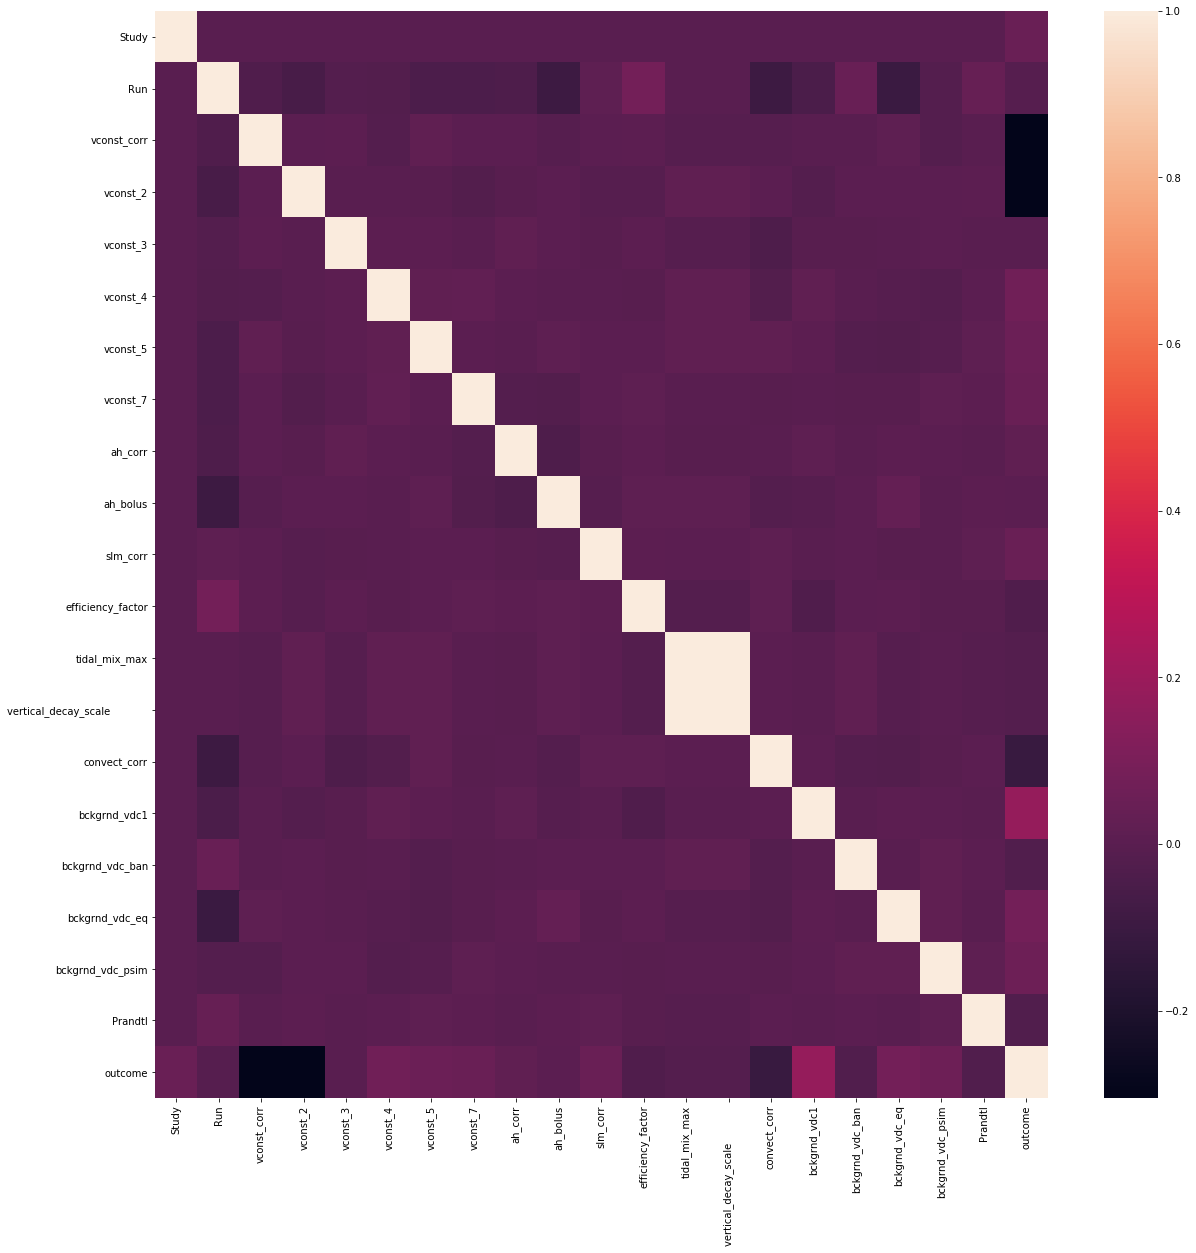

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())
plt.show()

In [11]:
data.describe()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,2.000000,90.500000,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,...,0.500111,0.499984,0.499984,0.499953,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,0.817254,52.008901,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,...,0.288966,0.289127,0.289127,0.288877,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,1.000000,1.000000,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,...,0.002015,0.000419,0.000419,0.001188,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,1.000000,45.750000,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,0.250402,...,0.250758,0.251676,0.251676,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,2.000000,90.500000,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,...,0.500393,0.500322,0.500322,0.500219,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,3.000000,135.250000,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,0.749091,...,0.749447,0.749346,0.749346,0.749539,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,3.000000,180.000000,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,...,0.999536,0.999942,0.999942,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


In [12]:
#Control if there is empty spaces or not
data.isnull().sum()


Study                               0
Run                                 0
vconst_corr                         0
vconst_2                            0
vconst_3                            0
vconst_4                            0
vconst_5                            0
vconst_7                            0
ah_corr                             0
ah_bolus                            0
slm_corr                            0
efficiency_factor                   0
tidal_mix_max                       0
vertical_decay_scale                0
convect_corr                        0
bckgrnd_vdc1                        0
bckgrnd_vdc_ban                     0
bckgrnd_vdc_eq                      0
bckgrnd_vdc_psim                    0
Prandtl                             0
outcome                             0
dtype: int64

### Mix data set

In [13]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,142,0.649366,0.167627,0.129363,0.408177,0.066166,0.659912,0.742137,0.406815,...,0.784111,0.788220,0.788220,0.041123,0.533720,0.459892,0.961959,0.869015,0.673660,1
1,3,30,0.893570,0.355212,0.066133,0.254635,0.239165,0.147224,0.255414,0.868011,...,0.612871,0.581760,0.581760,0.434276,0.162819,0.657756,0.852178,0.962780,0.560292,1
2,3,149,0.379486,0.113463,0.585678,0.257807,0.920813,0.669801,0.617307,0.274160,...,0.670572,0.300976,0.300976,0.063676,0.992424,0.746481,0.180050,0.909602,0.624390,1
3,3,155,0.582796,0.770086,0.333053,0.034803,0.307772,0.680384,0.174043,0.263835,...,0.330181,0.910594,0.910594,0.552673,0.406325,0.743248,0.243003,0.083429,0.399201,0
4,3,105,0.763550,0.566536,0.805273,0.502555,0.078713,0.589690,0.712578,0.379268,...,0.418419,0.000498,0.000498,0.226376,0.701267,0.720803,0.663945,0.061565,0.318909,1


In [14]:
#get outcome column from dataframe
y = data['outcome']
X = data.drop('outcome',axis=1)
X.shape, y.shape

((540, 20), (540,))

In [15]:
# Split data set 70 train 30 test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((378, 20), (162, 20))

## Classification Section

In [16]:
#theses lists will store the results of classification algorithms
model = []
trainAcc = []
testAcc = []

#function in order to store model and accuracy of it

def storeResults(MODEL, a,b):
    model.append(MODEL)
    trainAcc.append(round(a, 3))
    testAcc.append(round(b, 3))

### Decision Tree Classifier


In [17]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model with depth of 5
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
##assign prediction results to the variables
yTestTree = tree.predict(X_test)
yTrainTree = tree.predict(X_train)

In [19]:
#Accuracy informations 
acc_train_tree = accuracy_score(y_train,yTrainTree)
acc_test_tree = accuracy_score(y_test,yTestTree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.981
Decision Tree: Accuracy on test Data: 0.938


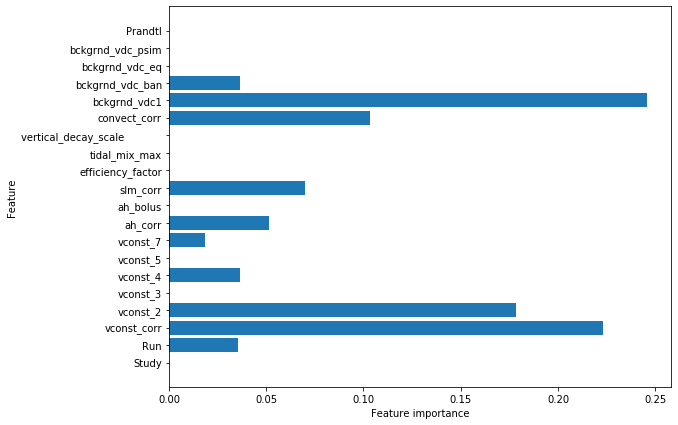

In [20]:
#Feature Importance
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [21]:
#Store the accuracy result
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Random Forest Classifier


In [22]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
##assign prediction results to the variables
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [24]:
#Accuracy informations
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.955
Random forest: Accuracy on test Data: 0.932


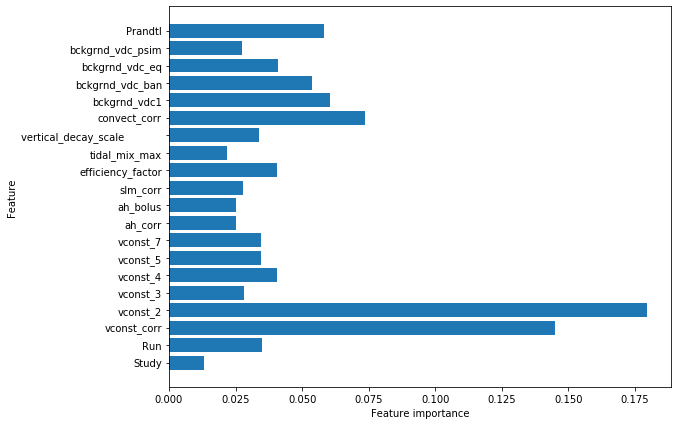

In [25]:
#Feature Importance
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [26]:
#Sonucu tut
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### Support Vector Machines




In [27]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
####assign prediction results to the variables
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [29]:
#Accuracy informations
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.950
SVM : Accuracy on test Data: 0.963


In [30]:
#Store results
storeResults('SVM', acc_train_svm, acc_test_svm)

### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)*100

91.9753086419753

In [32]:
##assign prediction results to the variables
y_test_knn=neigh.predict(X_test)
y_train_knn = neigh.predict(X_train)

In [33]:
#Accuracy information
trainAccKnn = accuracy_score(y_train,y_train_knn)
testAccKnn = accuracy_score(y_test,y_test_knn)

print("Random forest: Accuracy on training Data: {:.3f}".format(trainAccKnn))
print("Random forest: Accuracy on test Data: {:.3f}".format(testAccKnn))

Random forest: Accuracy on training Data: 0.913
Random forest: Accuracy on test Data: 0.920


In [34]:
#Store result
storeResults('KNN', trainAccKnn, testAccKnn)

In [41]:
#Create dataframe in order to store all algorithms and their performances.
results = pd.DataFrame({ 'model': model,    
    'Train Accuracy': trainAcc,
    'Test Accuracy': testAcc})
results

,model,Train Accuracy,Test Accuracy
0,Decision Tree,0.981,0.938
1,Random Forest,0.955,0.932
2,SVM,0.950,0.963
3,KNN,0.913,0.920


In [42]:
#Sort in  descending order  
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,model,Train Accuracy,Test Accuracy
2,SVM,0.950,0.963
0,Decision Tree,0.981,0.938
1,Random Forest,0.955,0.932
3,KNN,0.913,0.920
